# Imports

In [1]:
import sys, os
from pathlib import Path

import pandas as pd

In [2]:
# adiciona a pasta src ao path
sys.path.append(os.path.abspath("../src"))

# importa tudo do funcs.py
from funcs import *

In [3]:
# Definindo raiz do projeto
BASE_DIR = Path(os.getcwd()).parent
sys.path.append(str(BASE_DIR))

In [4]:
# Definindo diretório de dados de entrada
DATA_DIR = BASE_DIR / "dados" / "dados_tratados"

In [5]:
df = pd.read_csv(DATA_DIR / "dados_tratados_agrupados.csv", sep=';')

In [6]:
df

,CD_CLIENTE,DS_PROD_moda,DS_LIN_REC_moda,CIDADE_moda,DS_CNAE_moda,DS_SEGMENTO_moda,DS_SUBSEGMENTO_moda,MARCA_TOTVS_moda,MODAL_COMERC_moda,PAIS_moda,PERIODICIDADE_moda,UF_moda,VL_TOTAL_CONTRATO_soma,faixa_vl_total_soma_contratos,DIAS_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,SP,8.120772e+03,0.0-0.5M,2943,0.0,0.000000
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,SC,1.634142e+06,1.5-2.0M,3454,0.0,0.000000
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,4.271960e+01,0.0-0.5M,7037,0.0,0.000000
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,8.531457e+04,0.0-0.5M,1192,0.0,0.000000
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,2.051230e+02,0.0-0.5M,8664,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,MG,3.041294e+04,0.0-0.5M,184,2.0,30412.949059
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,6.010675e+01,0.0-0.5M,181,1.0,60.106753
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CE,3.600225e+02,0.0-0.5M,181,1.0,360.022549
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,RS,1.705934e+03,0.0-0.5M,181,1.0,1705.933728


# Tratamento Final

In [7]:
# Definindo datasets para treinamento
df_agrupado, df_agrupado_2, x = trata_df_final(df, normalizar = False)

In [8]:
# Definindo k_mak como 6
k_max = 6
lista_init, valores_k = define_k_e_init(k_max, huang=False)

In [9]:
# Separando colunas categoricas
categorical_idx = trata_colunas_categoricas(x)

# Clusterização


Clusterização com k=3:

Clusterização com k=3, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 199, ncost: 3171961866403660.0
Run: 1, iteration: 2/100, moves: 245, ncost: 1933830411177607.0
Run: 1, iteration: 3/100, moves: 211, ncost: 696377607711666.9
Run: 1, iteration: 4/100, moves: 78, ncost: 602914997871287.2
Run: 1, iteration: 5/100, moves: 24, ncost: 569048829760718.5
Run: 1, iteration: 6/100, moves: 13, ncost: 548777241402748.25
Run: 1, it

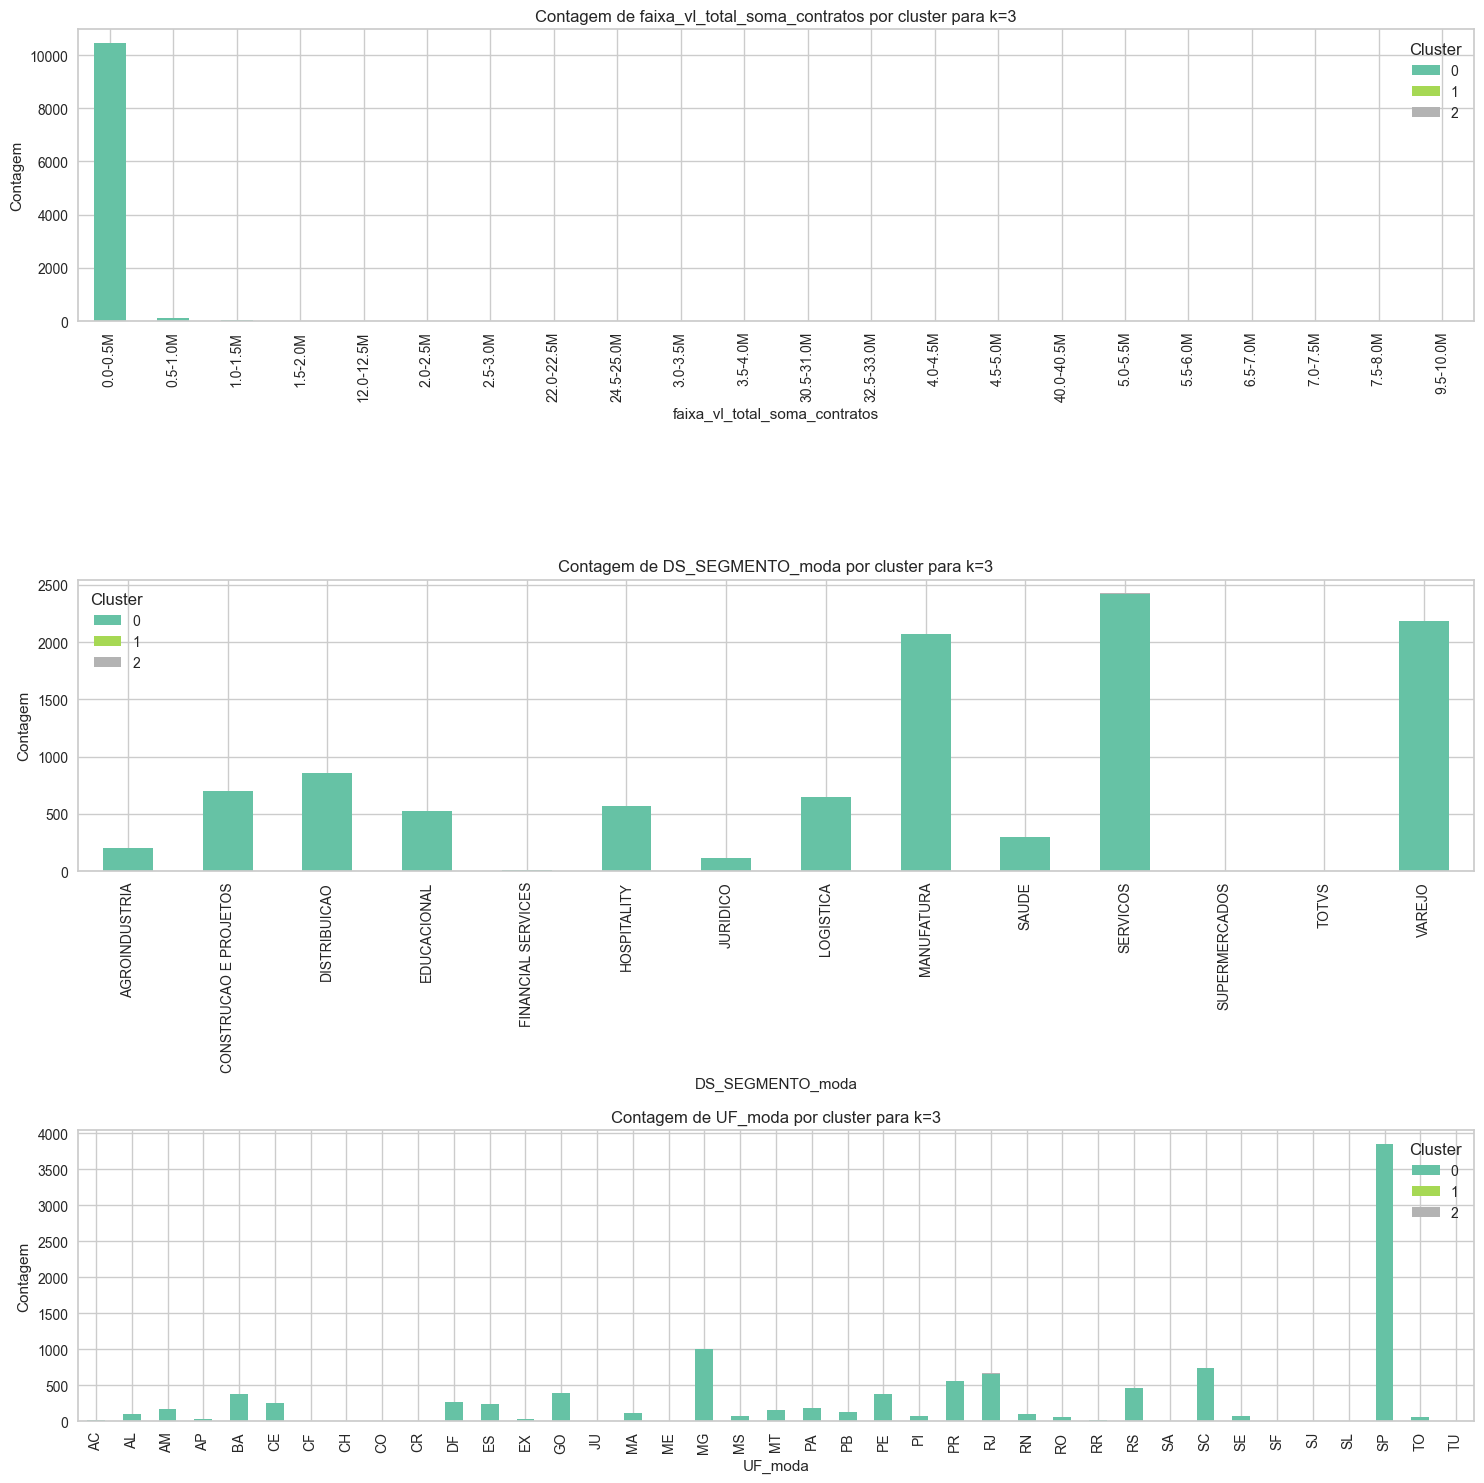

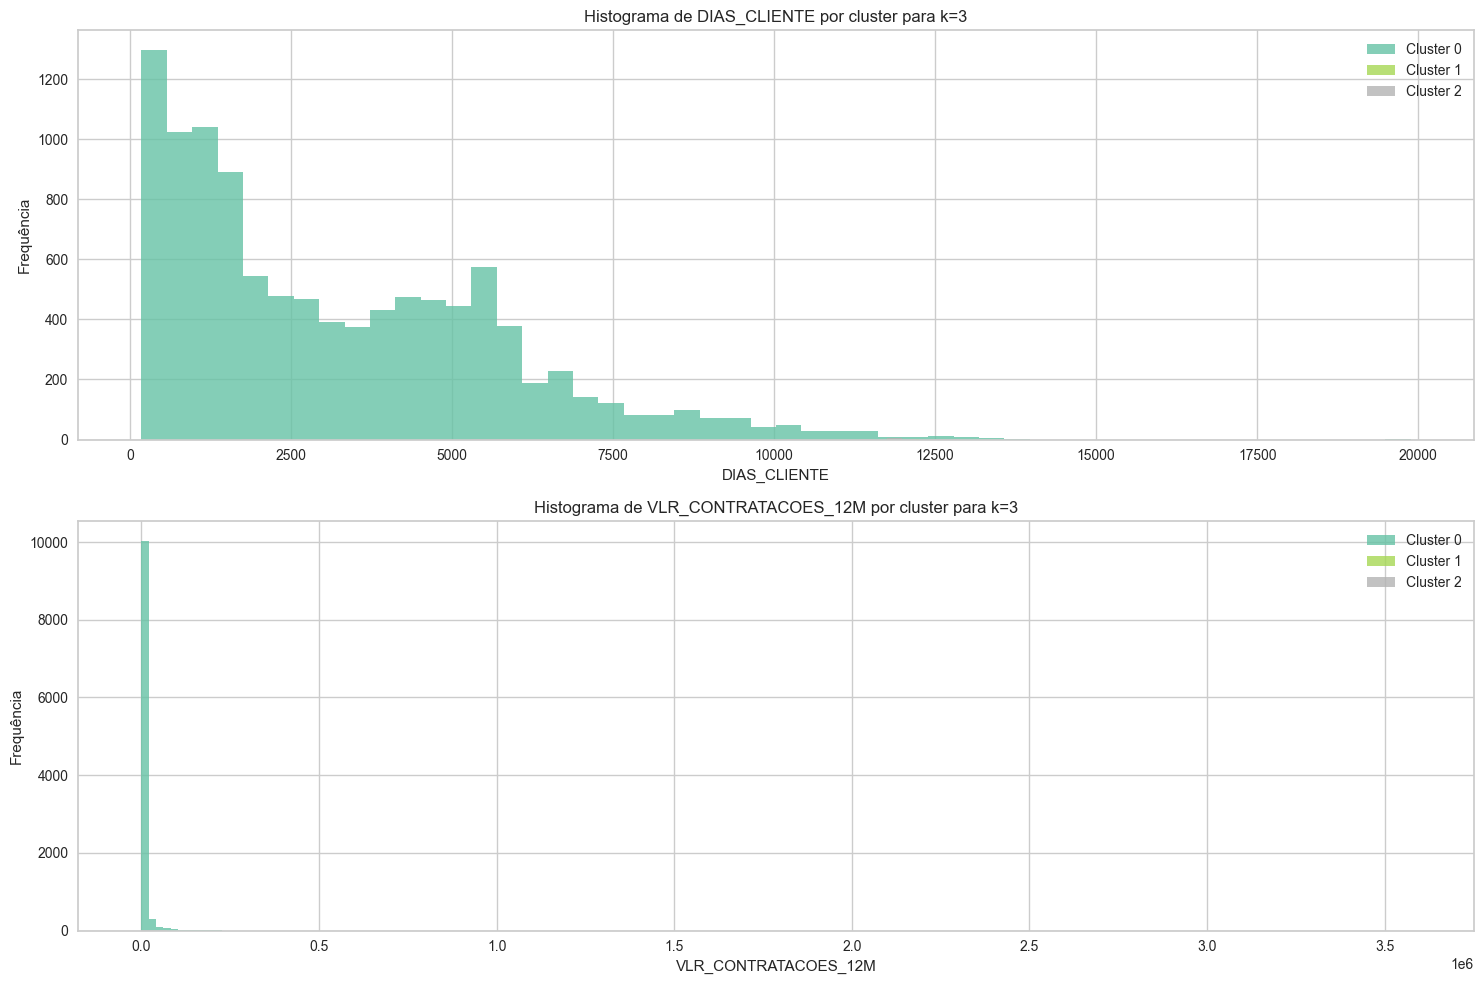


Clusterização com k=4:

Clusterização com k=4, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids


KeyboardInterrupt: 

In [10]:
clusteriza_kproto_final(valores_k, lista_init, df_agrupado, df_agrupado_2, x, categorical_idx, graficos=True)


# Avaliação Final

In [ ]:
# métricas para avaliação do k ideal

for k in range (3, k_max+1):
    with pd.option_context('display.float_format', '{:.2f}'.format):

        print(df_agrupado_2.groupby(f'cluster_{k}').agg({'CD_CLIENTE': 'count',
                                                    'UF_moda': agg_moda,
                                                    'VL_TOTAL_CONTRATO_soma': ['sum', 'median', 'min', 'max'],
                                                    'DIAS_CLIENTE': 'median',
                                                    'QTD_CONTRATACOES_12M': 'mean',
                                                    'VLR_CONTRATACOES_12M': 'mean'}).reset_index().value_counts())

(cluster_3, )  (CD_CLIENTE, count)  (UF_moda, agg_moda)  (VL_TOTAL_CONTRATO_soma, sum)  (VL_TOTAL_CONTRATO_soma, median)  (VL_TOTAL_CONTRATO_soma, min)  (VL_TOTAL_CONTRATO_soma, max)  (DIAS_CLIENTE, median)  (QTD_CONTRATACOES_12M, mean)  (VLR_CONTRATACOES_12M, mean)
0              10589                SP                   483338591.73                   5334.64                           0.00                           2537780.05                     2552.00                 0.75                          4245.84                         1
1              5                    SP                   150341076.04                   30962261.14                       22154425.07                    40060521.43                    11741.00                0.40                          0.00                            1
2              21                   SP                   110768628.66                   4559474.47                        2750965.04                     12432809.61                    11897

- k=3 com maior score, mas com número muito pequenoi de clusters.
- k=6 copm número expressivo de clusters, mas pior avaliação.
- k=5 definido como ideal.
- Todas as clusterizações testadas com kprototypes constam no dataset final.

# Exports

In [ ]:
# renomeando colunas do df final

df_agrupado_2.columns = ['CD_CLIENTE', 'DS_PROD_MODA', 'DS_LIN_REC_MODA', 'CIDADE',
       'DS_CNAE', 'DS_SEGMENTO', 'DS_SUBSEGMENTO',
       'MARCA_TOTVS_MODA', 'MODAL_COMERC_MODA', 'PAIS',
       'PERIODICIDADE_MODA', 'UF', 'VL_TOTAL_CONTRATO_SOMA',
       'FAIXA_VLR_TOT_SOMA_CONTRATOS', 'DIAS_CLIENTE', 'QTD_CONTRATACOES_12M',
       'VLR_CONTRATACOES_12M', 'CLUSTER_3', 'CLUSTER_4', 'CLUSTER_5',
       'CLUSTER_6']

In [ ]:
df_agrupado_2

,CD_CLIENTE,DS_PROD_MODA,DS_LIN_REC_MODA,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,MARCA_TOTVS_MODA,MODAL_COMERC_MODA,PAIS,...,UF,VL_TOTAL_CONTRATO_SOMA,FAIXA_VLR_TOT_SOMA_CONTRATOS,DIAS_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,SP,8.120772e+03,0.0-0.5M,2943,0.0,0.000000,0,2,3,2
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,...,SC,1.634142e+06,1.5-2.0M,3454,0.0,0.000000,0,1,4,1
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,...,SP,4.271960e+01,0.0-0.5M,7037,0.0,0.000000,0,2,3,2
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,GO,8.531457e+04,0.0-0.5M,1192,0.0,0.000000,0,2,3,2
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,...,SP,2.051230e+02,0.0-0.5M,8664,0.0,0.000000,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,MG,3.041294e+04,0.0-0.5M,184,2.0,30412.949059,0,2,3,2
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,GO,6.010675e+01,0.0-0.5M,181,1.0,60.106753,0,2,3,2
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,CE,3.600225e+02,0.0-0.5M,181,1.0,360.022549,0,2,3,2
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,RS,1.705934e+03,0.0-0.5M,181,1.0,1705.933728,0,2,3,2


In [ ]:
# Definindo diretório de dados de entrada
DATA_DIR_FINAL = BASE_DIR / "dados" / "dataset_final"

In [ ]:
df_agrupado_2.to_csv(DATA_DIR_FINAL / 'clientes_clusterizados.csv', index=False, sep=';')